20BCE1732
Nitharshan CV
ML lab
CART Classifier for Iris Dataset

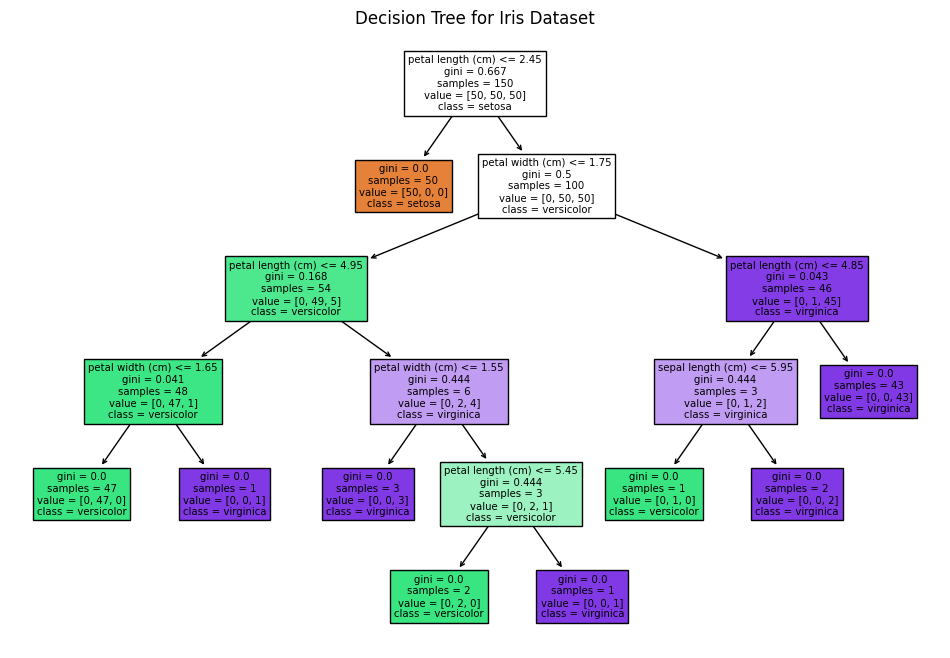

In [6]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()


In [3]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)

tree_rules = export_text(clf, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n", tree_rules)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   | 

In [4]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

clf = DecisionTreeClassifier(random_state=42)

k = 5
scores = cross_val_score(clf, X, y, cv=k)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean() * 100:.2f}%")


Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy: 95.33%


In [5]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = DecisionTreeClassifier(**best_params)

best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {final_accuracy * 100:.2f}%")


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Final Accuracy: 100.00%
